## S LOARKS matrix 
###### Author: Zimu Huo
###### Date: 07.2022



-------------------------------------------------------------------------
References
    
    [1] 
    Author: Justin P. Haldar 
    Title: Low-Rank Modeling of Local -Space Neighborhoods (LORAKS) for Constrained MRI
    Link: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6678771

In [2]:
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.fft import *
from util.phantom import * 
from util.rank import *
import random
import util.mask as undersample
from numpy import linalg as linalg
from util.SPARSE import *

In [3]:
data = np.load("../../lib/single_slice.npy")
data = fft2c(rsos(ifft2c(data)))
[ny, nx] = data.shape
print(data.shape)

(256, 256)


0.7390289306640625


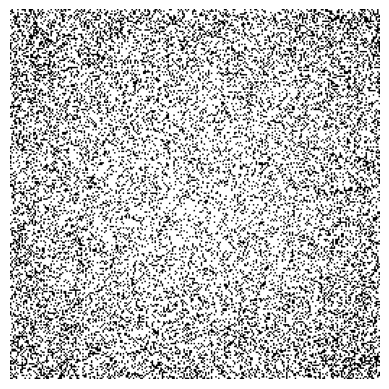

In [4]:
def var_den_mask(shape, R):
    start = 1e-7
    end = 0.1
    for i in range(20):    
        cur = (start + end)/2
        mask = var_dens_mask([ny, nx], cur)
        curR = undersampling_rate(mask)
        print(curR, R)
        if curR < 1/R: 
            end = (start + end) /2
        else: 
            start = (start + end) /2
    return mask

mask = var_dens_mask([ny, nx], 0.00001)
print(undersampling_rate(mask))
show(mask)

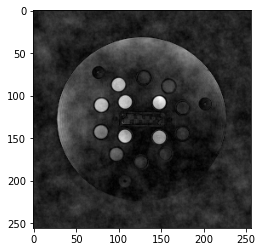

In [4]:
dataR = data * mask
show(ifft2c(dataR))

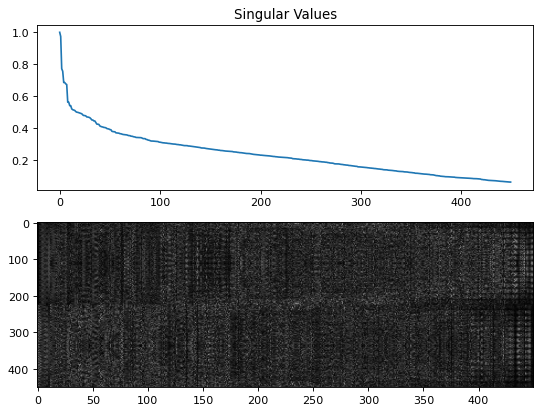

In [5]:
inspect_rank(LOARKS_S(dataR, 15))

In [6]:
import numpy.matlib
from scipy.linalg import block_diag
res = np.copy(dataR)
[ny, nx] = dataR.shape
rank = 200
k = 15

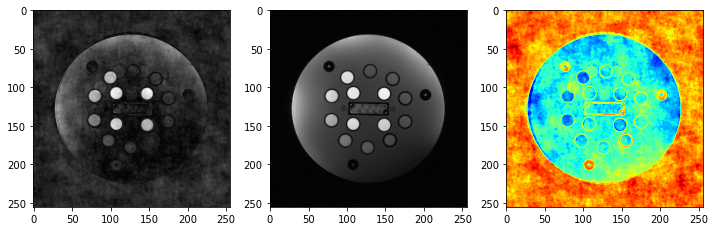

84.6681288851257


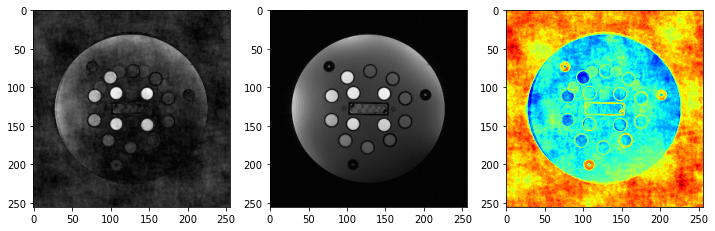

74.97292540582808


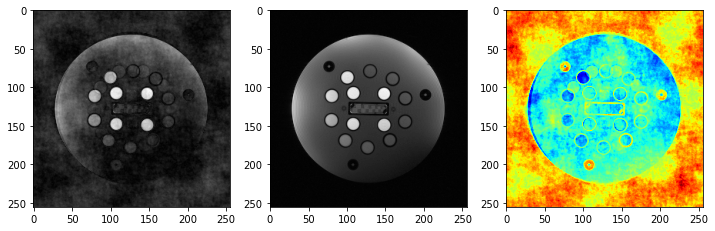

66.0690237173114


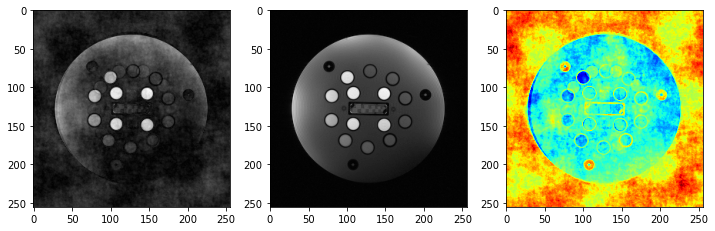

59.3540866144095


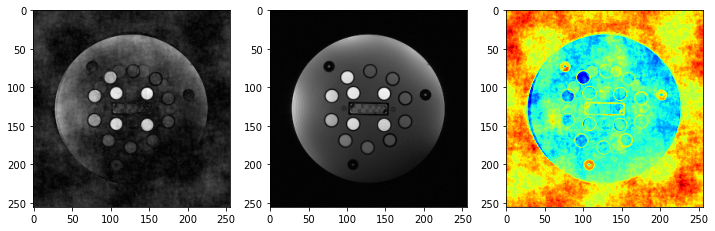

53.90184694186859


In [7]:
log = []
for i in range(50):
    C = LOARKS_C(res, k)
    Cr = rank_approx(C, rank)
    Kc = LOARKS_Cinv(Cr, k, data.shape)
    res = dataR + np.abs(1-mask) * Kc
    if i > 0:
        log.append(linalg.norm(res)-linalg.norm(prev))
    prev = res
    
    if (i % 10)==0: 
        plt.figure(figsize = (12, 8))
        plt.subplot(131)
        plt.imshow(np.abs((ifft2c(res))), cmap ="gray")
        plt.subplot(132)
        plt.imshow(np.abs((ifft2c(data))), cmap ="gray")
        plt.subplot(133)
        plt.imshow(np.abs((ifft2c(res)))-np.abs((ifft2c(data))), cmap ="jet")
        plt.show()
        print(np.sum((np.abs((ifft2c(res)))-np.abs((ifft2c(data))))**2))